TWITTER SENTIMENT ANALYSIS

In [2]:
#IMPORT THE LIBRARIES 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
#IMPORT THE DATASET

twitter_dataset = pd.read_csv('Twitter Dataset.csv')
print(twitter_dataset.shape)

(50900, 3)


In [4]:
twitter_dataset.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at...
4,5,0,i think mi bf is cheating on me!!! T_T


In [5]:
#CHECKING IF THERE ARE ANY NULL VALUES
twitter_dataset.isnull().any()

ItemID           False
Sentiment        False
SentimentText    False
dtype: bool

<Axes: >

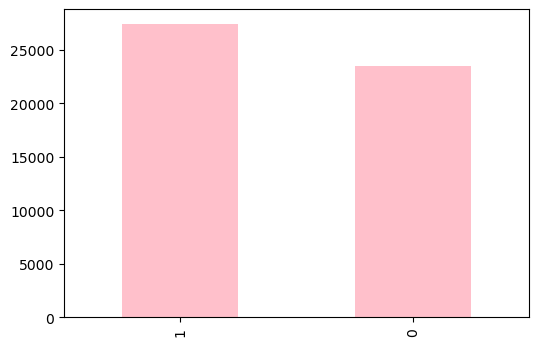

In [6]:
#NO OF SAMPLES OF EACH CLASS 
twitter_dataset['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

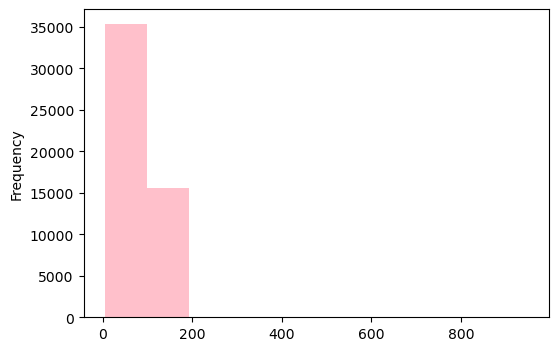

In [7]:
# checking the distribution of tweets in the data

length_train = twitter_dataset['SentimentText'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

In [8]:
# adding a column to represent the length of the tweet

twitter_dataset['len'] = twitter_dataset['SentimentText'].str.len()
twitter_dataset.head()

,ItemID,Sentiment,SentimentText,len
0,1,0,is so sad for my APL friend.............,40
1,2,0,I missed the New Moon trailer...,32
2,3,1,omg its already 7:30 :O,23
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at...,122
4,5,0,i think mi bf is cheating on me!!! T_T,44


In [9]:
twitter_dataset.groupby('Sentiment').describe()

ItemID                                                     \
             count          mean           std  min      25%      50%   
Sentiment                                                               
0          23475.0  23465.926305  15136.464394  1.0  10187.5  22340.0   
1          27425.0  27166.408168  14086.519825  3.0  15224.0  27584.0   

                                 len                                         \
               75%      max    count       mean        std  min   25%   50%   
Sentiment                                                                     
0          36635.0  50911.0  23475.0  76.222833  38.125542  4.0  45.0  72.0   
1          39391.0  50910.0  27425.0  76.108186  36.652211  5.0  45.0  72.0   

                         
             75%    max  
Sentiment                
0          108.0  949.0  
1          107.0  181.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

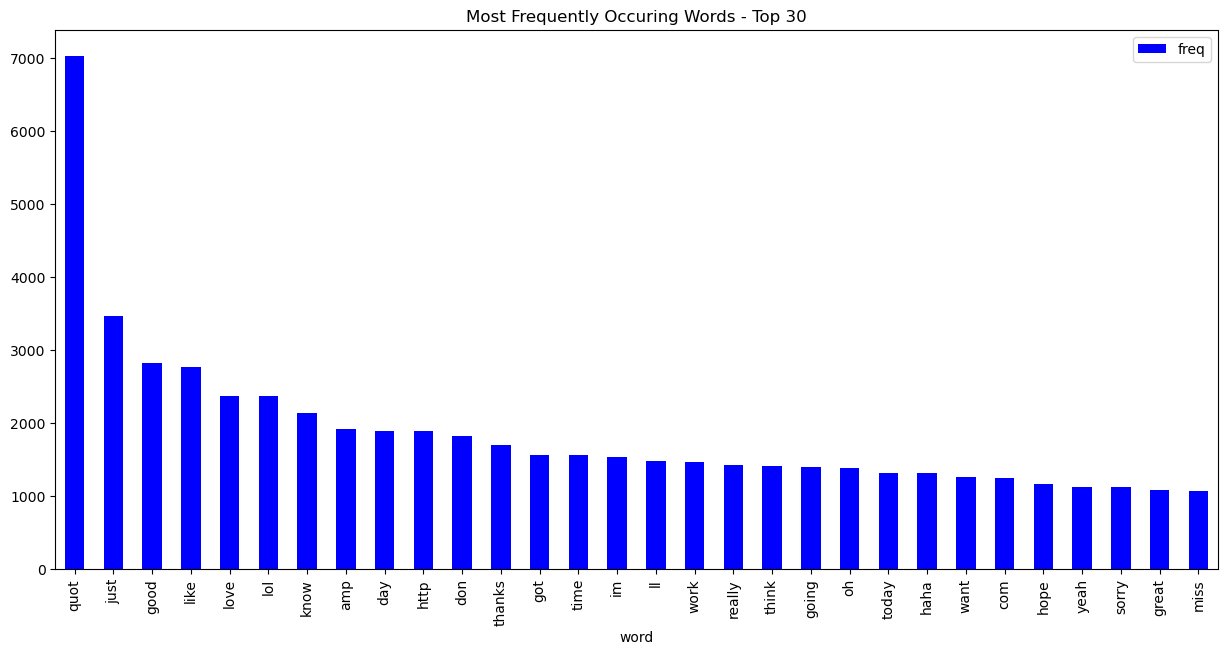

In [10]:
#GRAPH OF MOST FREQUENTLY OCCURING WORDS

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(twitter_dataset.SentimentText)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

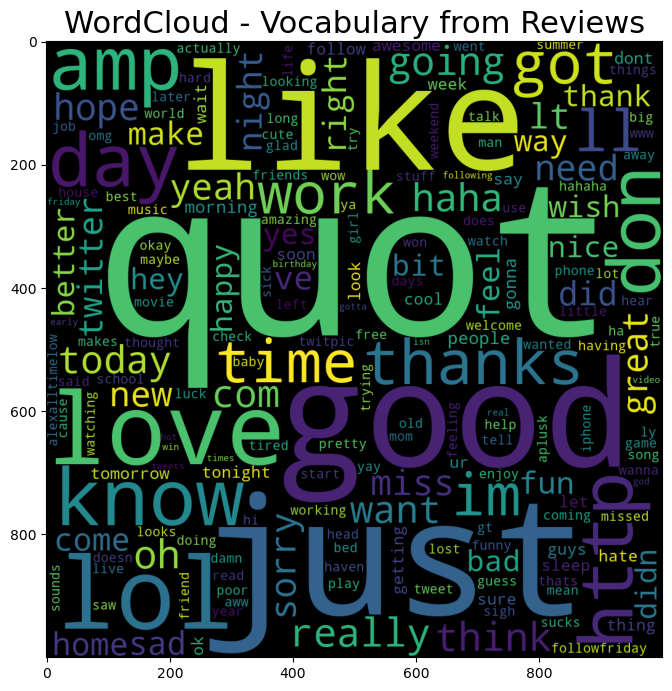

In [11]:
#PLOT OF ALL WORDS IN THE REVIEWS
from wordcloud import WordCloud

wordcloud = WordCloud( width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


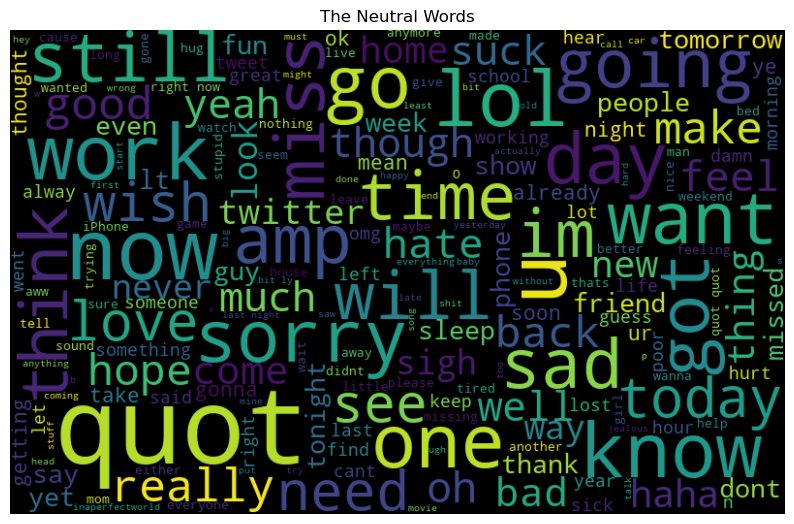

In [13]:
#PLOT OF POSITIVE/NEUTRAL WORDS
normal_words =' '.join([text for text in twitter_dataset['SentimentText'][twitter_dataset['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


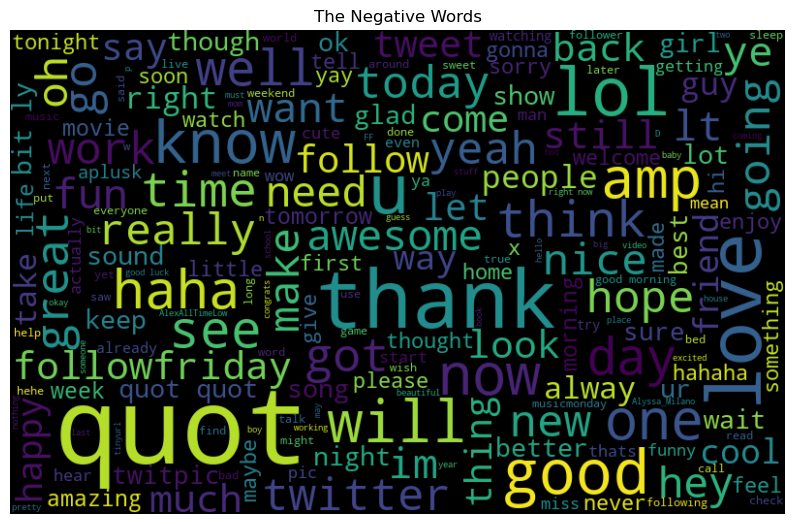

In [14]:
#PLOT OF NEGATIVE WORDS
negative_words =' '.join([text for text in twitter_dataset['SentimentText'][twitter_dataset['Sentiment'] == 1]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


TEXT PREPROCESSING

In [15]:
#clean the raw text
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [16]:
# extracting hashtags from negative tweets
HT_regular = hashtag_extract(twitter_dataset['SentimentText'][twitter_dataset['Sentiment'] == 0])

# extracting hashtags from positive tweets
HT_negative = hashtag_extract(twitter_dataset['SentimentText'][twitter_dataset['Sentiment'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

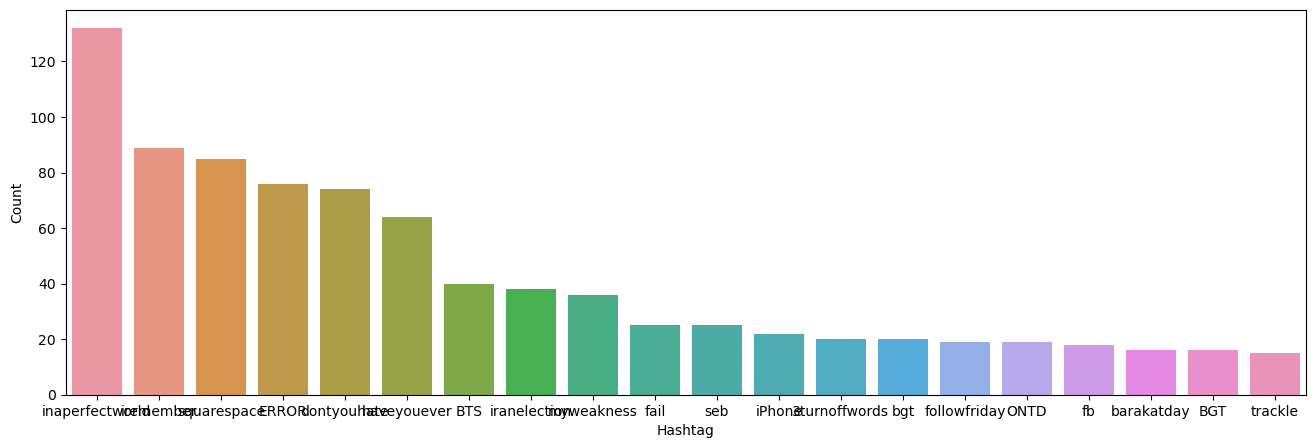

In [17]:
#PLOT OF FREQUENTLY OCCURING POSITIVE HASHTAGS
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

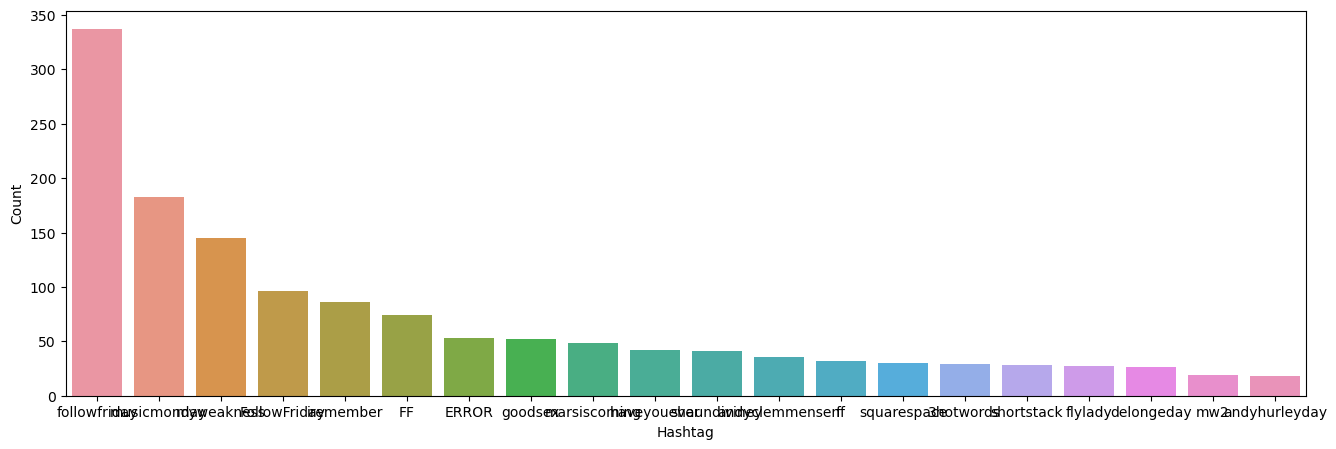

In [18]:
#PLOT OF FREQUENTLY OCCURING NEGATIVE HASHTAGS
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [19]:
# removing unwanted patterns from the data

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /Users/jaanu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
twitter_corpus = []

for i in range(0,50900):
  review = re.sub('[^a-zA-Z]', ' ', twitter_dataset['SentimentText'][i]) #removing mentions,special charecters,stopwords,hyperlinks,
                                                                                #numbers,whitespaces
  review = review.lower() #CONVERTING ALL LETTERS TO LOWERCASE
  review = review.split() #TOKENIZATION
  ps = PorterStemmer()
  # STEMMING
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  twitter_corpus.append(review)

WORD EMBEDDING

In [21]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 3000)
x = cv.fit_transform(twitter_corpus).toarray()
y = twitter_dataset.iloc[:, 1]

print(x.shape)
print(y.shape)


(50900, 3000)
(50900,)


SPLITTING THE DATASET TO TRAINING AND TESTING SETS

In [22]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38175, 3000)
(12725, 3000)
(38175,)
(12725,)


In [23]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


MODEL FITTING

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model1 = LogisticRegression(max_iter=200)
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

print("Training Accuracy :", (model1.score(x_train, y_train)) *100 )
print("Validation Accuracy :", (model1.score(x_test, y_test)) *100 )

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred1))

# confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix",cm1)


Training Accuracy : 78.08775376555337
Validation Accuracy : 73.10805500982318
f1 score : 0.7573393844844704
Confusion Matrix [[3963 1883]
 [1539 5340]]


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model2 = DecisionTreeClassifier(max_leaf_nodes = 600)

model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

print("Training Accuracy :", (model2.score(x_train, y_train))*100)
print("Validation Accuracy :", (model2.score(x_test, y_test))*100)

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred2))

# confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix",cm2)


Training Accuracy : 75.30320890635232
Validation Accuracy : 70.33398821218074
f1 score : 0.7427597955706985
Confusion Matrix [[3500 2346]
 [1429 5450]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model3 = RandomForestClassifier(max_leaf_nodes=700)
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

print("Training Accuracy :", (model3.score(x_train, y_train))*100)
print("Validation Accuracy :", (model3.score(x_test, y_test))*100)

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred3))

# confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix",cm3)


Training Accuracy : 77.81532416502947
Validation Accuracy : 73.1237721021611
F1 score : 0.7615727830451757
Confusion Matrix [[3843 2003]
 [1417 5462]]


In [27]:
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(x_train, y_train)

y_pred4 = model4.predict(x_test)

print("Training Accuracy :", (model4.score(x_train, y_train))*100)
print("Validation Accuracy :", (model4.score(x_test, y_test))*100)

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred4))

# confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix",cm4)


Training Accuracy : 70.27897838899804
Validation Accuracy : 65.34381139489194
f1 score : 0.6434923201293452
Confusion Matrix [[4335 1511]
 [2899 3980]]


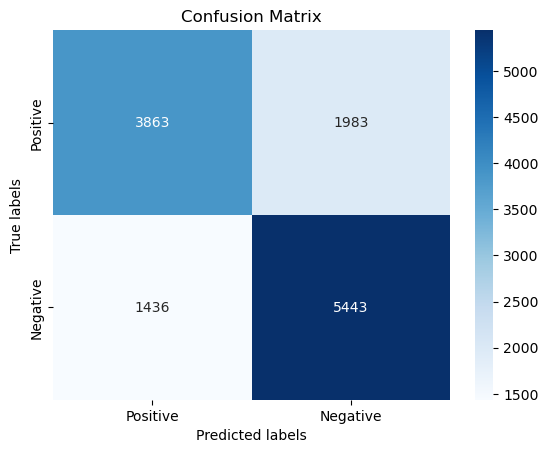

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cm3, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);